# Import Libraries

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [113]:
# Install missing package(s) required for imports


# Basic imports
import joblib
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML imports
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Data Wrangling

## Load data

In [3]:
# Import data
df = pd.read_csv("HR-Employee-Attrition.csv")

# Display first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Dimension
df.shape

(1470, 35)

## Inspect data

In [5]:
# Data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.select_dtypes(include=['object']).nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [7]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)


<Axes: >

In [9]:
# Statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Check for duplicates
print(df.duplicated().sum())

0


In [11]:
# Remove columns that are not needed
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

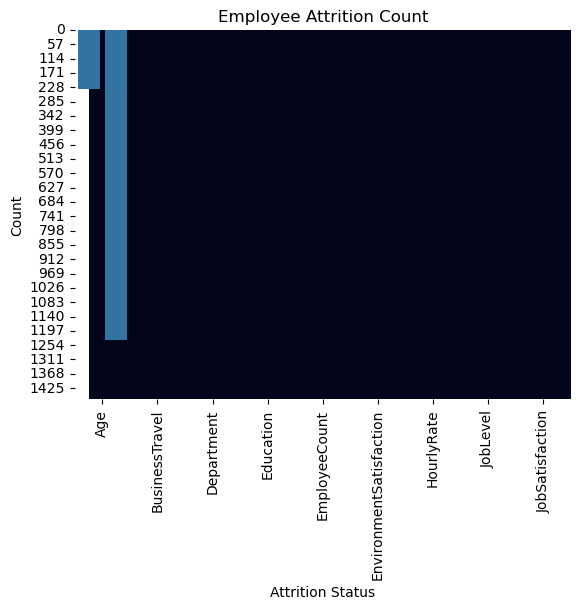

In [12]:
# Create a count plot for the 'Attrition' column
sns.countplot(x='Attrition', data=df)

# Add title and labels
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.title('Employee Attrition Count')

# Show the plot
plt.show()

In [13]:
# Calculate attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Mean=36.92, Median=36.00, Skewness=0.413, Kurtosis=-0.404


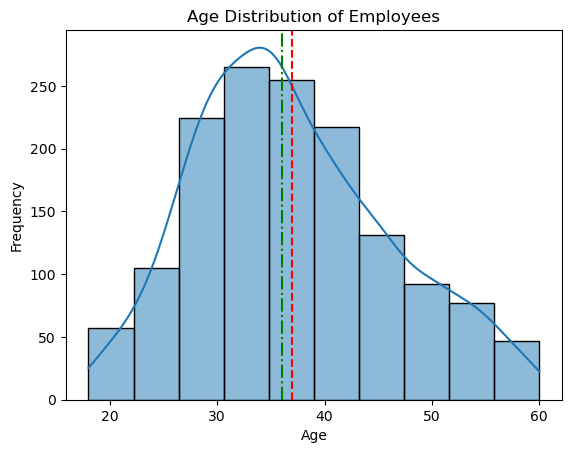

In [14]:
# Mean and median of 'Age'
mean_age = df['Age'].mean()
median_age = df['Age'].median()
skew = df['Age'].skew()
kurt = df['Age'].kurtosis()
print(f"Mean={mean_age:.2f}, Median={median_age:.2f}, Skewness={skew:.3f}, Kurtosis={kurt:.3f}")

#print(f"Mean Age: {mean_age}, Median Age: {median_age}")

# Create a histogram for 'Age'
sns.histplot(df['Age'], bins=10, kde=True)

# Plot vertical lines for mean and median
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean = {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-.', label=f'Median = {median_age:.1f}')

# Add title and labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')

# Show the plot
plt.show()

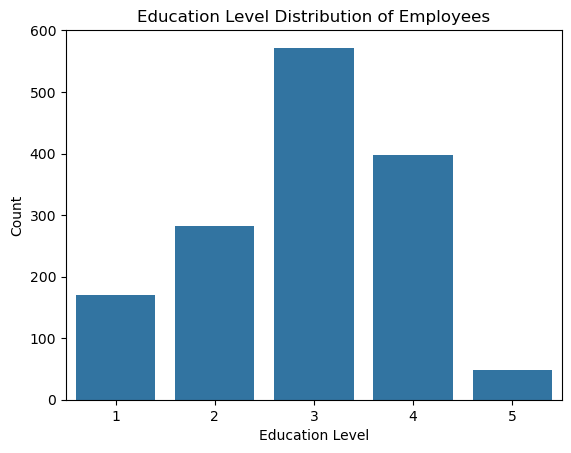

In [15]:
# Create a countplot for Education
sns.countplot(x='Education', data=df)

# Add title and labels
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution of Employees')

# Show the plot
plt.show()

Mean=6502.93, Median=4919.00, Skewness=1.370, Kurtosis=1.005


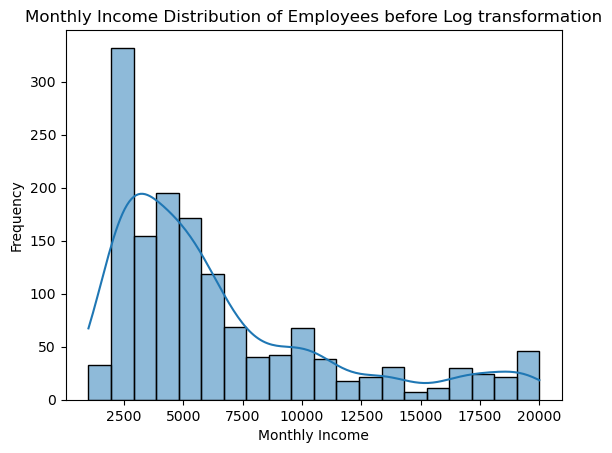

In [16]:
# Mean and median of 'monthly income'
mean_income = df['MonthlyIncome'].mean()
median_income = df['MonthlyIncome'].median()
skew = df['MonthlyIncome'].skew()
kurt = df['MonthlyIncome'].kurtosis()
print(f"Mean={mean_income:.2f}, Median={median_income:.2f}, Skewness={skew:.3f}, Kurtosis={kurt:.3f}")
# Create a histogram for 'monthly income'
sns.histplot(df['MonthlyIncome'], bins=20, kde=True)

# Add title and labels
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Distribution of Employees before Log transformation')

# Show the plot
plt.show()

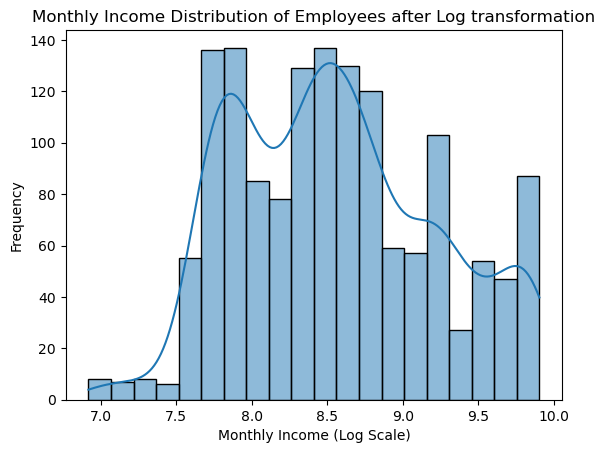

In [17]:
# Apply log transformation to 'MonthlyIncome'
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])

# Create a histogram for 'monthly income'
sns.histplot(df['MonthlyIncome_log'], bins=20, kde=True)

# Add title and labels
plt.xlabel('Monthly Income (Log Scale)')
plt.ylabel('Frequency')
plt.title('Monthly Income Distribution of Employees after Log transformation')

# Show the plot
plt.show()

### Bivariate Analysis

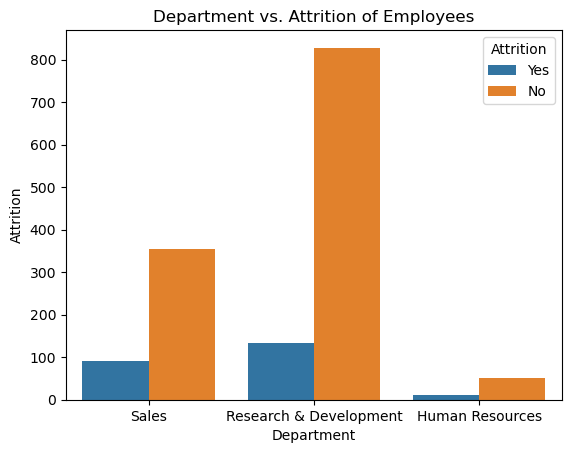

In [18]:
# Create a scatter plot of Department vs. Attrition
sns.countplot(x='Department', hue='Attrition', data=df)
# Add title and labels
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.title('Department vs. Attrition of Employees')
# Show the plot
plt.show()

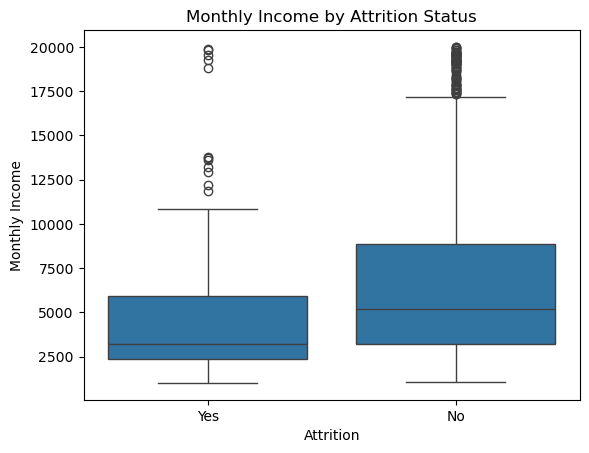

In [19]:
# Create a boxplot of attrition vs. monthly income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
# Add title and labels
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
# Show the plot
plt.show()

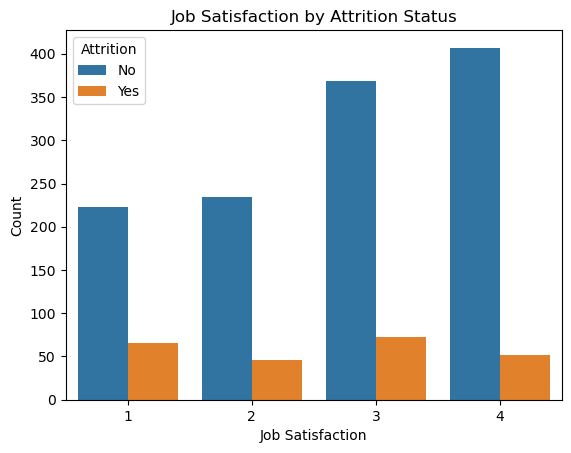

In [20]:
# Create a countplot of jobsatistfaction and hue it by attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
# Add title and labels
plt.title('Job Satisfaction by Attrition Status')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
# Show the plot
plt.show()

In [21]:
# Group by jobsatisfaction and calculate attrition rate
attrition_by_jobsat = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_by_jobsat)


Attrition              No       Yes
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290


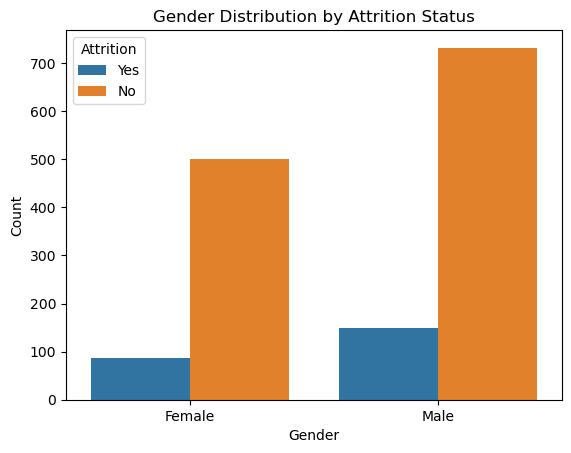

In [22]:
# Create a countplot for gender and hue it by attrition
sns.countplot(x='Gender', hue='Attrition', data=df)
# Add title and labels
plt.title('Gender Distribution by Attrition Status')
plt.xlabel('Gender')
plt.ylabel('Count')
# Show the plot
plt.show()

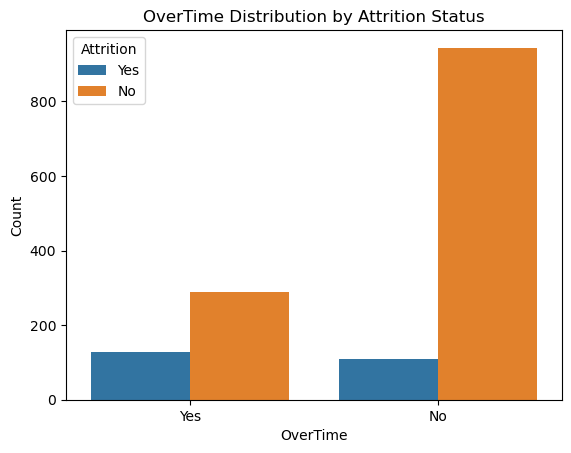

In [23]:
# Create a countplot for overtime and hue it by attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)

# Add title and labels
plt.title('OverTime Distribution by Attrition Status')
plt.xlabel('OverTime')
plt.ylabel('Count')

# Show the plot
plt.show()

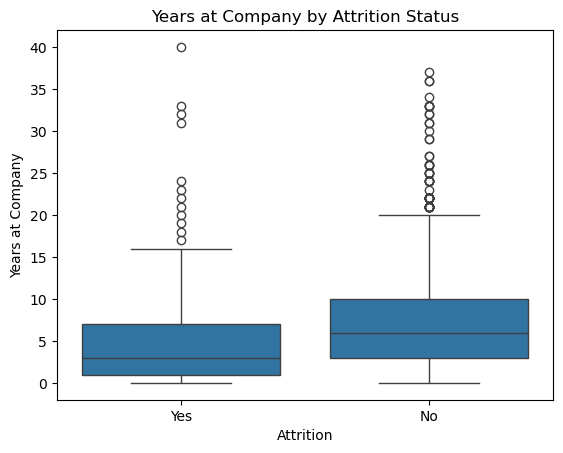

In [24]:
# Create a boxplot for years at company vs. attrition
sns.boxplot(x= 'Attrition',y='YearsAtCompany', data=df)
# Add title and labels
plt.title('Years at Company by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
# Show the plot
plt.show()

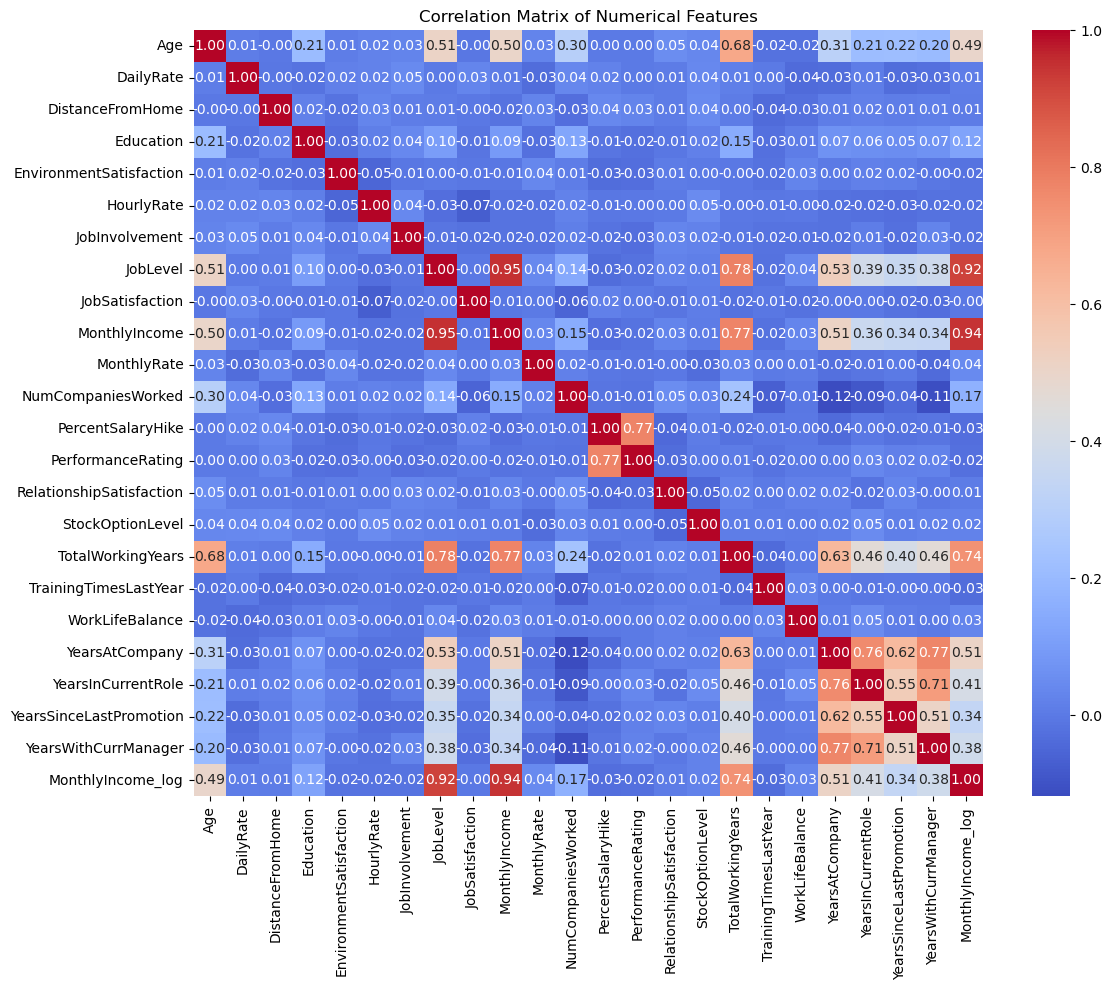

In [25]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Create a correlation matrix
corr_matrix = df[numerical_cols].corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=False)
# Add title and adjust layout
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
# Show the plot
plt.show()

In [26]:



upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
pairs = [(col, row, upper.loc[row, col]) for col in upper.columns for row in upper.index if upper.loc[row, col] > 0.6]
pairs


[('MonthlyIncome', 'JobLevel', np.float64(0.9502999134798473)),
 ('PerformanceRating', 'PercentSalaryHike', np.float64(0.7735499964012664)),
 ('TotalWorkingYears', 'Age', np.float64(0.6803805357911985)),
 ('TotalWorkingYears', 'JobLevel', np.float64(0.7822078045362748)),
 ('TotalWorkingYears', 'MonthlyIncome', np.float64(0.7728932462543574)),
 ('YearsAtCompany', 'TotalWorkingYears', np.float64(0.6281331552682468)),
 ('YearsInCurrentRole', 'YearsAtCompany', np.float64(0.7587537366134619)),
 ('YearsSinceLastPromotion', 'YearsAtCompany', np.float64(0.6184088652176047)),
 ('YearsWithCurrManager', 'YearsAtCompany', np.float64(0.7692124251007031)),
 ('YearsWithCurrManager',
  'YearsInCurrentRole',
  np.float64(0.7143647616385931)),
 ('MonthlyIncome_log', 'JobLevel', np.float64(0.9200458014790098)),
 ('MonthlyIncome_log', 'MonthlyIncome', np.float64(0.9442920318345476)),
 ('MonthlyIncome_log', 'TotalWorkingYears', np.float64(0.7406325709101598))]

## Summary

1. ~16% of employees left (data imbalance issue)

2. Attrition is higher among employees who:

    * Work OverTime

    * Have low JobSatisfaction

    * Earn lower MonthlyIncome

    * Spent fewer years at the company

    * Were male Employees

3. Heat Map
    * Income & Job Level: The strongest correlation is between monthly income and job level, highlighting the hierarchical pay structure.

    * Experience & Tenure: Years worked and tenure at the company/role are moderately to strongly correlated, which reflects standard career progression.

    * Performance & Salary Hike: Performance ratings align moderately with percent salary hikes, suggesting compensation is partially merit-based.

    * Log-Transformed Income: The log transformation maintains the relationships but can help in reducing skew for modeling purposes.

### Feature Engineering

In [27]:
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing

Age                         0
Attrition                   0
YearsWithCurrManager        0
YearsSinceLastPromotion     0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
NumCompaniesWorked          0
MonthlyRate                 0
MonthlyIncome               0
MaritalStatus               0
JobSatisfaction             0
JobRole                     0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
MonthlyIncome_log           0
dtype: int64

In [28]:
print(df.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome_log']


In [29]:
# Job Role Grouping
jobrole_map = {
    "Sales Executive": "Sales Executive",
    "Research Scientist": "Research Scientist",
    "Laboratory Technician": "Laboratory Technician"
}

df["JobRole_Grouped"] = df["JobRole"].apply(lambda x: jobrole_map[x] if x in jobrole_map else "Other")

# Drop original JobRole column
df = df.drop(columns=["JobRole"])  # remove original

In [30]:
# Categorical Features
binary_cats = ['Gender','OverTime']
small_cats = ["BusinessTravel", "Department", "EducationField", "MaritalStatus"]
jobrole_cat = ["JobRole_Grouped"]

# Numeric Features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [31]:
df.columns.value_counts()

Age                         1
Attrition                   1
MonthlyIncome_log           1
YearsWithCurrManager        1
YearsSinceLastPromotion     1
YearsInCurrentRole          1
YearsAtCompany              1
WorkLifeBalance             1
TrainingTimesLastYear       1
TotalWorkingYears           1
StockOptionLevel            1
RelationshipSatisfaction    1
PerformanceRating           1
PercentSalaryHike           1
OverTime                    1
NumCompaniesWorked          1
MonthlyRate                 1
MonthlyIncome               1
MaritalStatus               1
JobSatisfaction             1
JobLevel                    1
JobInvolvement              1
HourlyRate                  1
Gender                      1
EnvironmentSatisfaction     1
EducationField              1
Education                   1
DistanceFromHome            1
Department                  1
DailyRate                   1
BusinessTravel              1
JobRole_Grouped             1
Name: count, dtype: int64

In [32]:
numeric_features 

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'MonthlyIncome_log']

In [33]:
print(df.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome_log', 'JobRole_Grouped']


In [34]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_features)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome_log']


In [35]:
# Convert target to binary (0/1)
df['Attrition_bin'] = df['Attrition'].map({'Yes':1, 'No':0})

# Drop original target column
df.drop(columns=['Attrition'], axis=1, inplace=True)

In [36]:
# Split data into features and target
X = df.drop('Attrition_bin', axis=1)
y = df['Attrition_bin']

In [37]:
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (1470, 31), y.shape: (1470,)


In [38]:
# Split data into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, 
                                                    shuffle=True, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, 
                                                shuffle=True, stratify=y_temp)

# print shapes of splits
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X_train.shape: (882, 31), y_train.shape: (882,)
X_val.shape: (294, 31), y_val.shape: (294,)
X_test.shape: (294, 31), y_test.shape: (294,)


In [39]:

# PREPROCESSOR PIPELINE
preprocessor = ColumnTransformer(
    transformers=[
        ("binary", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), binary_cats),
        ("small", OneHotEncoder(drop="first", handle_unknown="ignore"), small_cats),
        ("jobrole", OneHotEncoder(drop="first", handle_unknown="ignore"), jobrole_cat)
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
    
)


# PIPELINE 

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor)
    ]
)

In [40]:
X_train.dtypes

Age                           int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion     

In [41]:

# TRANSFORM TRAIN/VAL/TEST
X_train_encoded = pipeline.fit_transform(X_train)
X_val_encoded   = pipeline.transform(X_val)
X_test_encoded  = pipeline.transform(X_test)
# Get feature names


# Convert back to dataframe for VIF
encoded_feature_names = pipeline.named_steps["preprocess"].get_feature_names_out()

X_train_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_val_df   = pd.DataFrame(X_val_encoded,   columns=encoded_feature_names)
X_test_df  = pd.DataFrame(X_test_encoded,  columns=encoded_feature_names)

In [42]:
# Check for multicollinearity using VIF
X_train_vif = X_train_df.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i)
                   for i in range(X_train_vif.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

                               feature         VIF
39                   MonthlyIncome_log  371.849681
29                   PerformanceRating  188.535210
23                            JobLevel   62.291916
6         EducationField_Life Sciences   47.199426
28                   PercentSalaryHike   45.451929
25                       MonthlyIncome   37.817316
4    Department_Research & Development   37.757001
16                                 Age   37.574389
8               EducationField_Medical   37.321051
5                     Department_Sales   21.021653
22                      JobInvolvement   16.433975
34                     WorkLifeBalance   16.073575
32                   TotalWorkingYears   15.406677
7             EducationField_Marketing   14.359865
10     EducationField_Technical Degree   12.274145
21                          HourlyRate   12.196014
35                      YearsAtCompany   11.915994
19                           Education    9.850760
15     JobRole_Grouped_Sales Ex

In [43]:
# Drop the features and assign the resulting DataFrame back to df 
features_to_drop = ['MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole',
                    'YearsWithCurrManager', 'PerformanceRating']
X_train_vif = X_train_vif.drop(columns=features_to_drop)
X_val_vif   = X_val_df.drop(columns=features_to_drop)
X_test_vif  = X_test_df.drop(columns=features_to_drop)

In [44]:
X_train_vif.head()

,Gender_Male,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncome_log
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,16998.0,2.0,11.0,3.0,0.0,2.0,2.0,0.0,0.0,8.062433
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12982.0,1.0,11.0,3.0,1.0,3.0,2.0,26.0,3.0,9.726333
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5843.0,6.0,13.0,2.0,0.0,2.0,2.0,2.0,2.0,9.254262
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11533.0,9.0,15.0,3.0,3.0,2.0,3.0,3.0,0.0,9.205428
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4267.0,5.0,12.0,1.0,2.0,5.0,3.0,0.0,0.0,8.367997


In [45]:
# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply to training set only
X_train_res, y_train_res = smote.fit_resample(X_train_vif, y_train)

# Check new class distribution
print(y_train.value_counts())
print(y_train_res.value_counts())


Attrition_bin
0    740
1    142
Name: count, dtype: int64
Attrition_bin
1    740
0    740
Name: count, dtype: int64


In [46]:
X_train_res

,Gender_Male,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncome_log
0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,16998.000000,2.000000,11.000000,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,8.062433
1,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,12982.000000,1.000000,11.000000,3.000000,1.000000,3.000000,2.000000,26.000000,3.000000,9.726333
2,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,5843.000000,6.000000,13.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,9.254262
3,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,11533.000000,9.000000,15.000000,3.000000,3.000000,2.000000,3.000000,3.000000,0.000000,9.205428
4,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,...,4267.000000,5.000000,12.000000,1.000000,2.000000,5.000000,3.000000,0.000000,0.000000,8.367997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0.560677,0.439323,0.439323,0.560677,0.439323,0.560677,0.439323,0.560677,0.000000,0.0,...,15692.532366,3.560677,12.317968,1.000000,0.560677,1.439323,3.560677,5.682032,2.242709,8.594788
1476,0.000000,0.000000,0.481062,0.518938,0.481062,0.000000,0.000000,0.000000,0.481062,0.0,...,3099.420527,1.000000,18.367433,3.037876,0.000000,1.924248,3.000000,7.291681,2.481062,8.155906
1477,1.000000,0.000000,0.884998,0.115002,0.115002,0.884998,0.115002,0.000000,0.000000,0.0,...,10598.184374,1.000000,16.884998,4.000000,0.000000,3.000000,3.000000,1.345005,0.115002,7.094998
1478,0.530265,0.469735,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,10148.733367,0.530265,17.409205,2.590795,0.469735,3.000000,3.469735,3.530265,0.530265,8.082944


In [47]:
# Define continuous columns
continuous_cols = [
    'Age', 
    'DailyRate', 
    'DistanceFromHome', 
    'HourlyRate',        
    'MonthlyRate', 
    'NumCompaniesWorked', 
    'PercentSalaryHike'
]


In [48]:
# Select continous columns 
scaler = StandardScaler()
X_train_vif[continuous_cols] = scaler.fit_transform(X_train_vif[continuous_cols])
X_train_res[continuous_cols] = scaler.fit_transform(X_train_res[continuous_cols])
X_val_vif[continuous_cols] = scaler.transform(X_val_vif[continuous_cols])
X_test_vif[continuous_cols] = scaler.transform(X_test_vif[continuous_cols])


In [49]:
X_train_res.head()

,Gender_Male,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncome_log
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.329012,-0.363540,-1.195536,3.0,0.0,2.0,2.0,0.0,0.0,8.062433
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.222003,-0.783012,-1.195536,3.0,1.0,3.0,2.0,26.0,3.0,9.726333
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-1.201509,1.314348,-0.599928,2.0,0.0,2.0,2.0,2.0,2.0,9.254262
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.420813,2.572765,-0.004320,3.0,3.0,2.0,3.0,3.0,0.0,9.205428
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.417744,0.894876,-0.897732,1.0,2.0,5.0,3.0,0.0,0.0,8.367997


In [50]:
X_train_vif.head()

,Gender_Male,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncome_log
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.372709,-0.288412,-1.149415,3.0,0.0,2.0,2.0,0.0,0.0,8.062433
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.184136,-0.688380,-1.149415,3.0,1.0,3.0,2.0,26.0,3.0,9.726333
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-1.174005,1.311459,-0.598445,2.0,0.0,2.0,2.0,2.0,2.0,9.254262
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.385049,2.511362,-0.047476,3.0,3.0,2.0,3.0,3.0,0.0,9.205428
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.392528,0.911491,-0.873930,1.0,2.0,5.0,3.0,0.0,0.0,8.367997


## Model

In [51]:
# KNN
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2' ],
    'solver': ['lbfgs']
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 50, None],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 4, 6]
}

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 1]
}

# SVM
svm = SVC(probability=True)
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [3, 5, 10, 12, None],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}




In [53]:
models = {
    "KNN": (knn, knn_params),
    "Logistic Regression": (lr, lr_params),
    "Random Forest": (rf, rf_params),
    "XGBoost": (xgb, xgb_params),
    "SVM": (svm, svm_params),
    "Decision Tree": (dt, dt_params)
}


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def train_validate_model(name, model, param_grid, 
                         X_train_vif, y_train, 
                         X_train_res, y_train_res, 
                         X_val_vif, y_val, 
                         scoring='roc_auc', cv=5):
    """
    Train and evaluate model:
    1. Training WITHOUT SMOTE
    2. Training WITH SMOTE

    Returns a dictionary containing full metrics for both.
    """

    def run_grid(model, params, X_tr, y_tr):
        """Run GridSearchCV."""
        grid = GridSearchCV(
            estimator=model,
            param_grid=params,
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_tr, y_tr)
        return grid

    # -----------------------------
    # 1️⃣ Train WITHOUT SMOTE
    # -----------------------------
    print(f"\n🔵 TRAINING WITHOUT SMOTE → {name}")
    grid_no_smote = run_grid(model, param_grid, X_train_vif, y_train)
    best_no = grid_no_smote.best_estimator_

    y_pred_no = best_no.predict(X_val_vif)
    y_proba_no = (
        best_no.predict_proba(X_val_vif)[:, 1] 
        if hasattr(best_no, "predict_proba") 
        else None
    )

    # -----------------------------
    # 2️⃣ Train WITH SMOTE
    # -----------------------------
    print(f"\n🟢 TRAINING WITH SMOTE → {name}")
    grid_smote = run_grid(model, param_grid, X_train_res, y_train_res)
    best_sm = grid_smote.best_estimator_

    y_pred_sm = best_sm.predict(X_val_vif)
    y_proba_sm = (
        best_sm.predict_proba(X_val_vif)[:, 1] 
        if hasattr(best_sm, "predict_proba") 
        else None
    )

    # -----------------------------
    # 📌 Return metrics for both
    # -----------------------------
    return {
        "Model": name,

        # NO SMOTE
        "NoSMOTE_Best Params": grid_no_smote.best_params_,
        "NoSMOTE_ROC-AUC (Grid)": grid_no_smote.best_score_,
        "NoSMOTE_Recall": recall_score(y_val, y_pred_no),
        "NoSMOTE_F1": f1_score(y_val, y_pred_no),
        "NoSMOTE_ROC-AUC": roc_auc_score(y_val, y_proba_no) if y_proba_no is not None else None,

        # SMOTE
        "SMOTE_Best Params": grid_smote.best_params_,
        "SMOTE_ROC-AUC (Grid)": grid_smote.best_score_,
        "SMOTE_Recall": recall_score(y_val, y_pred_sm),
        "SMOTE_F1": f1_score(y_val, y_pred_sm),
        "SMOTE_ROC-AUC": roc_auc_score(y_val, y_proba_sm) if y_proba_sm is not None else None
    }


In [55]:
# Create results list
results_list = []

# Train and validate each model
for name, (model, params) in models.items():
    metrics = train_validate_model(
        name,
        model,
        params,
        X_train_vif, y_train,          # <-- NO SMOTE
        X_train_res, y_train_res,  # <-- WITH SMOTE
        X_val_vif, y_val           # <-- VALIDATION
    )
    results_list.append(metrics)


🔵 TRAINING WITHOUT SMOTE → KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits

🟢 TRAINING WITH SMOTE → KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits

🔵 TRAINING WITHOUT SMOTE → Logistic Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits

🟢 TRAINING WITH SMOTE → Logistic Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits

🔵 TRAINING WITHOUT SMOTE → Random Forest
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

🟢 TRAINING WITH SMOTE → Random Forest
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

🔵 TRAINING WITHOUT SMOTE → XGBoost
Fitting 5 folds for each of 160 candidates, totalling 800 fits

🟢 TRAINING WITH SMOTE → XGBoost
Fitting 5 folds for each of 160 candidates, totalling 800 fits

🔵 TRAINING WITHOUT SMOTE → SVM
Fitting 5 folds for each of 16 candidates, totalling 80 fits

🟢 TRAINING WITH SMOTE → SVM
Fitting 5 folds for each of 16 candidates, totalling 80 fits

🔵 TRAINING WITHO

In [56]:
df_results = pd.DataFrame(results_list)
df_results


,Model,NoSMOTE_Best Params,NoSMOTE_ROC-AUC (Grid),NoSMOTE_Recall,NoSMOTE_F1,NoSMOTE_ROC-AUC,SMOTE_Best Params,SMOTE_ROC-AUC (Grid),SMOTE_Recall,SMOTE_F1,SMOTE_ROC-AUC
0,KNN,"{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}",0.692713,0.104167,0.185185,0.668742,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.987062,0.250000,0.233010,0.628853
1,Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.834368,0.375000,0.537313,0.849170,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.884551,0.729167,0.518519,0.839516
2,Random Forest,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.811075,0.083333,0.148148,0.804116,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.986696,0.187500,0.310345,0.808223
3,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.815018,0.250000,0.380952,0.801406,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.982515,0.333333,0.463768,0.817497
4,SVM,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}",0.832740,0.395833,0.542857,0.849001,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.983939,0.312500,0.375000,0.698086
5,Decision Tree,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.704625,0.104167,0.172414,0.705581,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.911117,0.437500,0.442105,0.737805


In [ ]:
# Select best model based on your Recall  metric
metric = "SMOTE_Recall"  

# get best-performing row
best_row = df_results.loc[df_results[metric].idxmax()]

# direct extraction
selected_model = best_row["Model"]
selected_params = best_row["SMOTE_Best Params"]

print("Best Model:", selected_model)
print("Best Parameters:", selected_params)


Best Model: Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [64]:
# Retrain the best model of train + val data
# Concantenate the train and and val data
X_full_train = pd.concat([X_train_vif, X_val_vif], axis=0)
y_full_train = pd.concat([y_train, y_val], axis=0)

# Apply SMOTE to the full training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_full_train, y_full_train)

# Initialize and fit the final model
final_model = LogisticRegression(
    C=1, penalty='l2', solver='lbfgs', max_iter=1000)
final_model.fit(X_res, y_res)


LogisticRegression(C=1, max_iter=1000)

In [65]:
# Predict on test set
y_pred = final_model.predict(X_test_vif)
y_proba = final_model.predict_proba(X_test_vif)[:, 1] 

In [103]:
# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall on test set: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score on test set: {f1:.4f}") 

# ROC / AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print(f"ROC-AUC on test set: {auc:.4f}")

Recall on test set: 0.7234
F1 Score on test set: 0.5000
ROC-AUC on test set: 0.7941


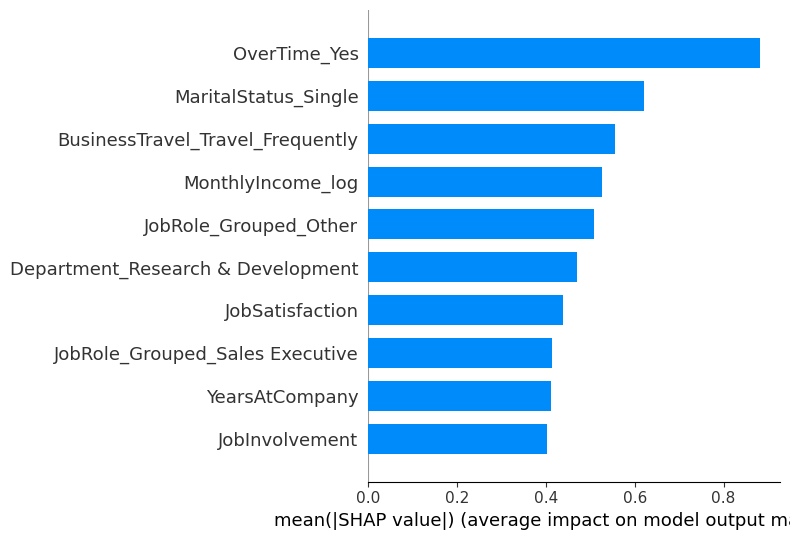

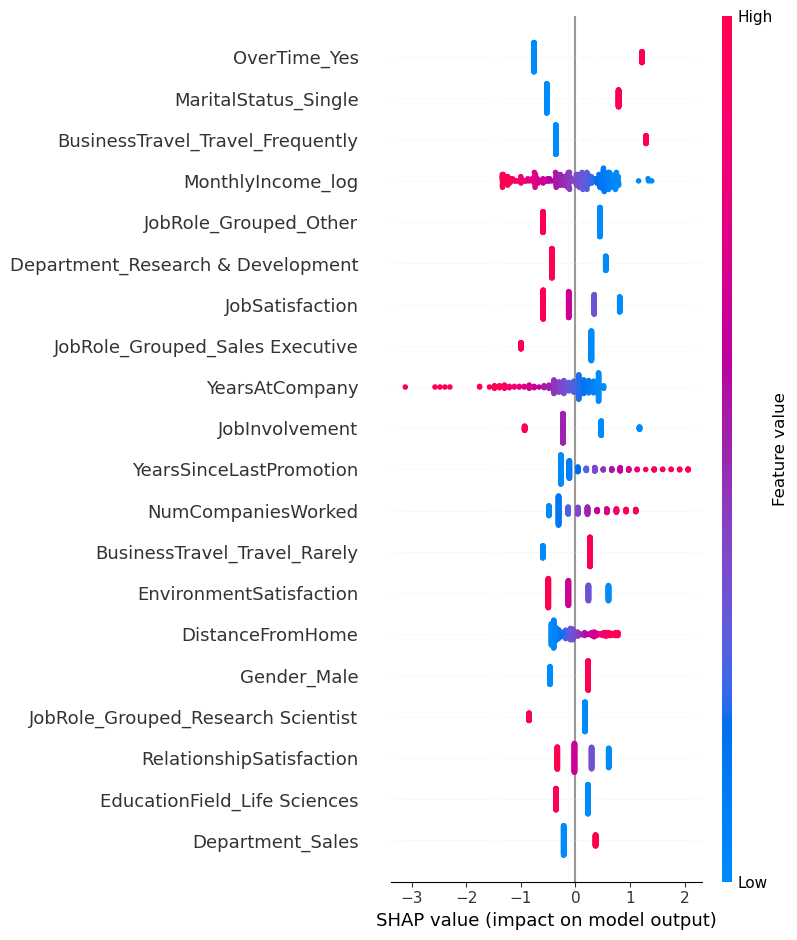

In [102]:
import shap

# Create explainer using the SMOTE-resampled training data
explainer = shap.LinearExplainer(final_model, X_res)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_vif)

# Summary plots
shap.summary_plot(shap_values, X_test_vif, plot_type="bar", max_display=10)   # feature importance
shap.summary_plot(shap_values, X_test_vif)                    # beeswarm plot

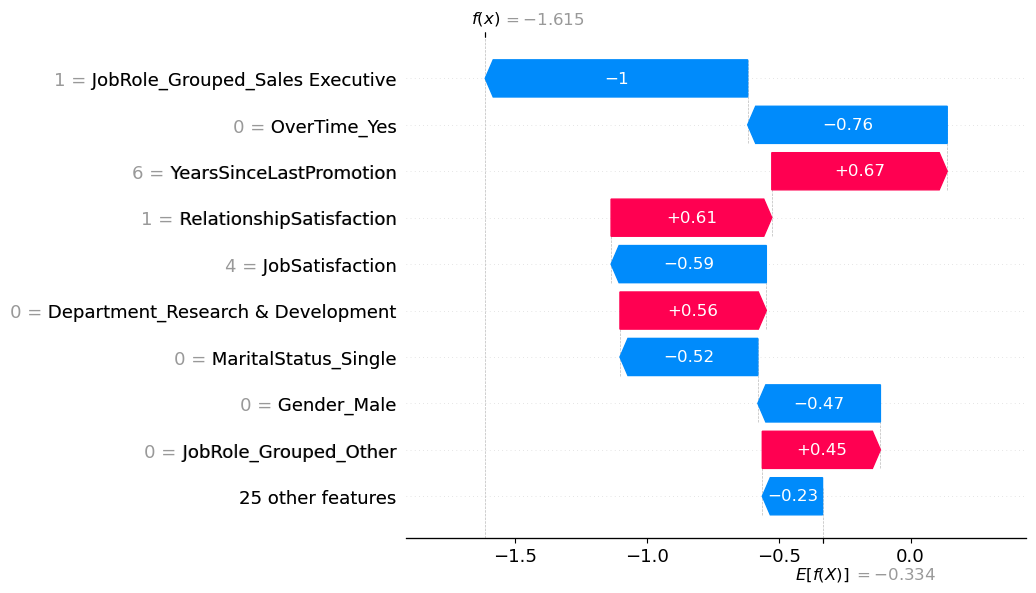

In [94]:
# Explain a single prediction
i = 0  # first test instance
shap.plots.waterfall(shap.Explanation(values=shap_values[i],
                                      base_values=explainer.expected_value,
                                      data=X_test_vif.iloc[i]))


| Metric       | Value  | Interpretation                                                                                                     |
| ------------ | ------ | ------------------------------------------------------------------------------------------------------------------ |
| **Recall**   | 0.7234 | The model correctly identifies ~72% of employees who will actually leave (good sensitivity).                       |
| **F1 Score** | 0.5000 | The balance between precision and recall is moderate — some false positives exist, as expected in imbalanced data. |
| **ROC-AUC**  | 0.7941 | The model has good overall ability to discriminate between leavers and stayers.                                    |


Key Insights

The model is reasonably good at detecting potential attrition, but precision is lower (reflected in the F1-score).

The ROC-AUC close to 0.8 indicates strong overall discriminative power.

SHAP analysis can be used to interpret which features drive attrition predictions.

### **SHAP Summary Plot Interpretation**

The SHAP (SHapley Additive exPlanations) summary plot visualizes **feature importance and their impact on model predictions**:

* **Y-axis**: Features ranked from most to least influential.
* **X-axis**: SHAP values (impact on attrition probability). Positive → increases risk; negative → decreases risk.
* **Color**: Red = high feature value, Blue = low feature value.
* **Spread**: Wide horizontal spread indicates strong influence or variability; dense clusters indicate consistent effect.

---

### **Key Insights**

**1️⃣ Strong Positive Drivers (Increase Attrition Risk)**

* **Overtime_Yes**: Largest impact; employees working overtime strongly predicted to leave.
* **MaritalStatus_Single**: Singles show higher turnover risk.
* **BusinessTravel_Travel_Frequently**: Frequent travel increases attrition, likely due to work-life imbalance.
* **YearsSinceLastPromotion (high values)**: Long time without promotion increases risk.
* **JobSatisfaction (mixed effect)**: Low satisfaction reduces predicted risk slightly; some high satisfaction clusters push positive.

**2️⃣ Strong Negative Drivers (Decrease Attrition Risk)**

* **BusinessTravel_Travel_Rarely**: Low travel reduces risk.
* **Department_Research & Development**: R&D affiliation lowers attrition likelihood.
* **JobRole_Grouped_Sales Executive**: Protective effect observed.
* **DistanceFromHome (low)**: Closer employees slightly less likely to leave.

**3️⃣ Moderate/Neutral Features**

* **MonthlyIncome_log**: Higher income mildly protective.
* **YearsAtCompany**: Longer tenure generally decreases risk.
* **NumCompaniesWorked**: Slight increase in risk, low impact.
* **Demographics** (Gender, EducationField, Department_Sales): Minimal influence.

---

### **Overall Interpretation**

* **Top 5 features explain ~70–80% of variance**.
* **Work-life factors** (overtime, travel, promotion gaps) dominate over demographics or satisfaction.
* Predictions are **stable**, without extreme outliers.
* **Recommendation**: Focus retention interventions on **overtime reduction, travel policies, and promotion cadence**.

---




In [109]:
# Selected features for final model
selected_features = X_train_vif.columns.tolist()
print("Selected Features for Final Model:")
for feature in selected_features:
    print(feature)


Selected Features for Final Model:
Gender_Male
OverTime_Yes
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Research & Development
Department_Sales
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
MaritalStatus_Married
MaritalStatus_Single
JobRole_Grouped_Other
JobRole_Grouped_Research Scientist
JobRole_Grouped_Sales Executive
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobSatisfaction
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
RelationshipSatisfaction
StockOptionLevel
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsSinceLastPromotion
MonthlyIncome_log


In [111]:
X_res.columns.nunique()

34

In [112]:
import joblib
# Save final model
joblib.dump(final_model, "final_logistic_model.pkl")
with open('finalized_model.sav', 'wb') as f:
    pickle.dump(final_model, f)

# Key for deployment: Save preprocessor (OHE), scaler (continuous), features
joblib.dump(pipeline, "preprocessor_ohe.pkl")  # OHE pipeline
joblib.dump(scaler, "scaler_continuous.pkl")
joblib.dump(selected_features, "selected_features.pkl")
joblib.dump(continuous_cols, "continuous_cols.pkl")  # For inference scaling

print("Training complete. Artifacts saved for split preprocessing.")


Training complete. Artifacts saved for split preprocessing.
